<a href="https://colab.research.google.com/github/Bhargava645/insurance/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

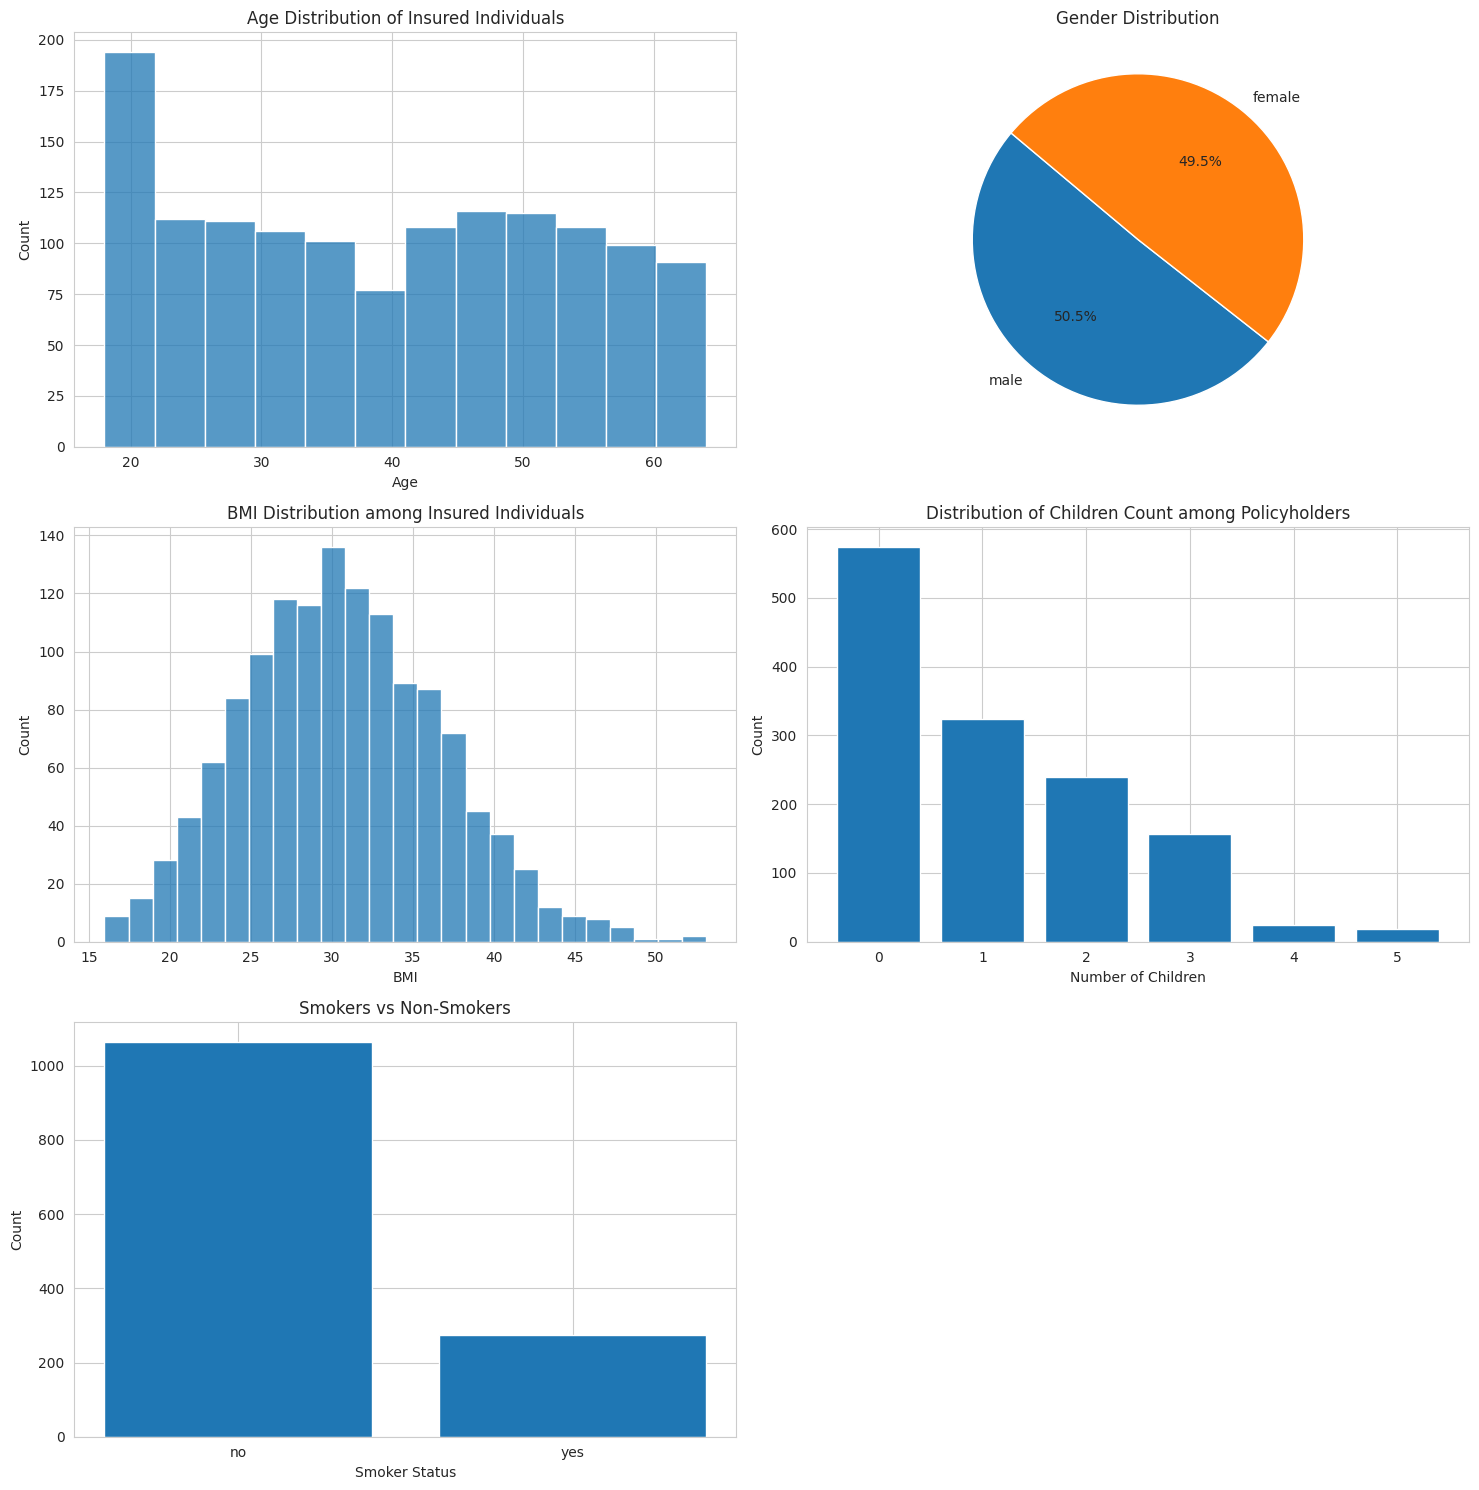

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

insurance_data = pd.read_csv("insurance.csv")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Data for visualizations
age_data = insurance_data['age']
gender_data = insurance_data['sex'].value_counts()
bmi_data = insurance_data['bmi']
children_data = insurance_data['children'].value_counts()
smoker_data = insurance_data['smoker'].value_counts()

# Creating the visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution (Histogram)
sns.histplot(age_data, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Insured Individuals')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution (Pie chart)
axes[0, 1].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Gender Distribution')

# Average BMI (Histogram)
sns.histplot(bmi_data, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('BMI Distribution among Insured Individuals')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Count')

# Distribution of children count (Bar chart)
children_data.sort_index(inplace=True)
axes[1, 1].bar(children_data.index, children_data.values)
axes[1, 1].set_title('Distribution of Children Count among Policyholders')
axes[1, 1].set_xlabel('Number of Children')
axes[1, 1].set_ylabel('Count')

# Smokers vs Non-smokers (Bar chart)
axes[2, 0].bar(smoker_data.index, smoker_data.values)
axes[2, 0].set_title('Smokers vs Non-Smokers')
axes[2, 0].set_xlabel('Smoker Status')
axes[2, 0].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Hide the empty subplot (since we have an odd number of plots)
axes[2, 1].set_visible(False)

plt.show()

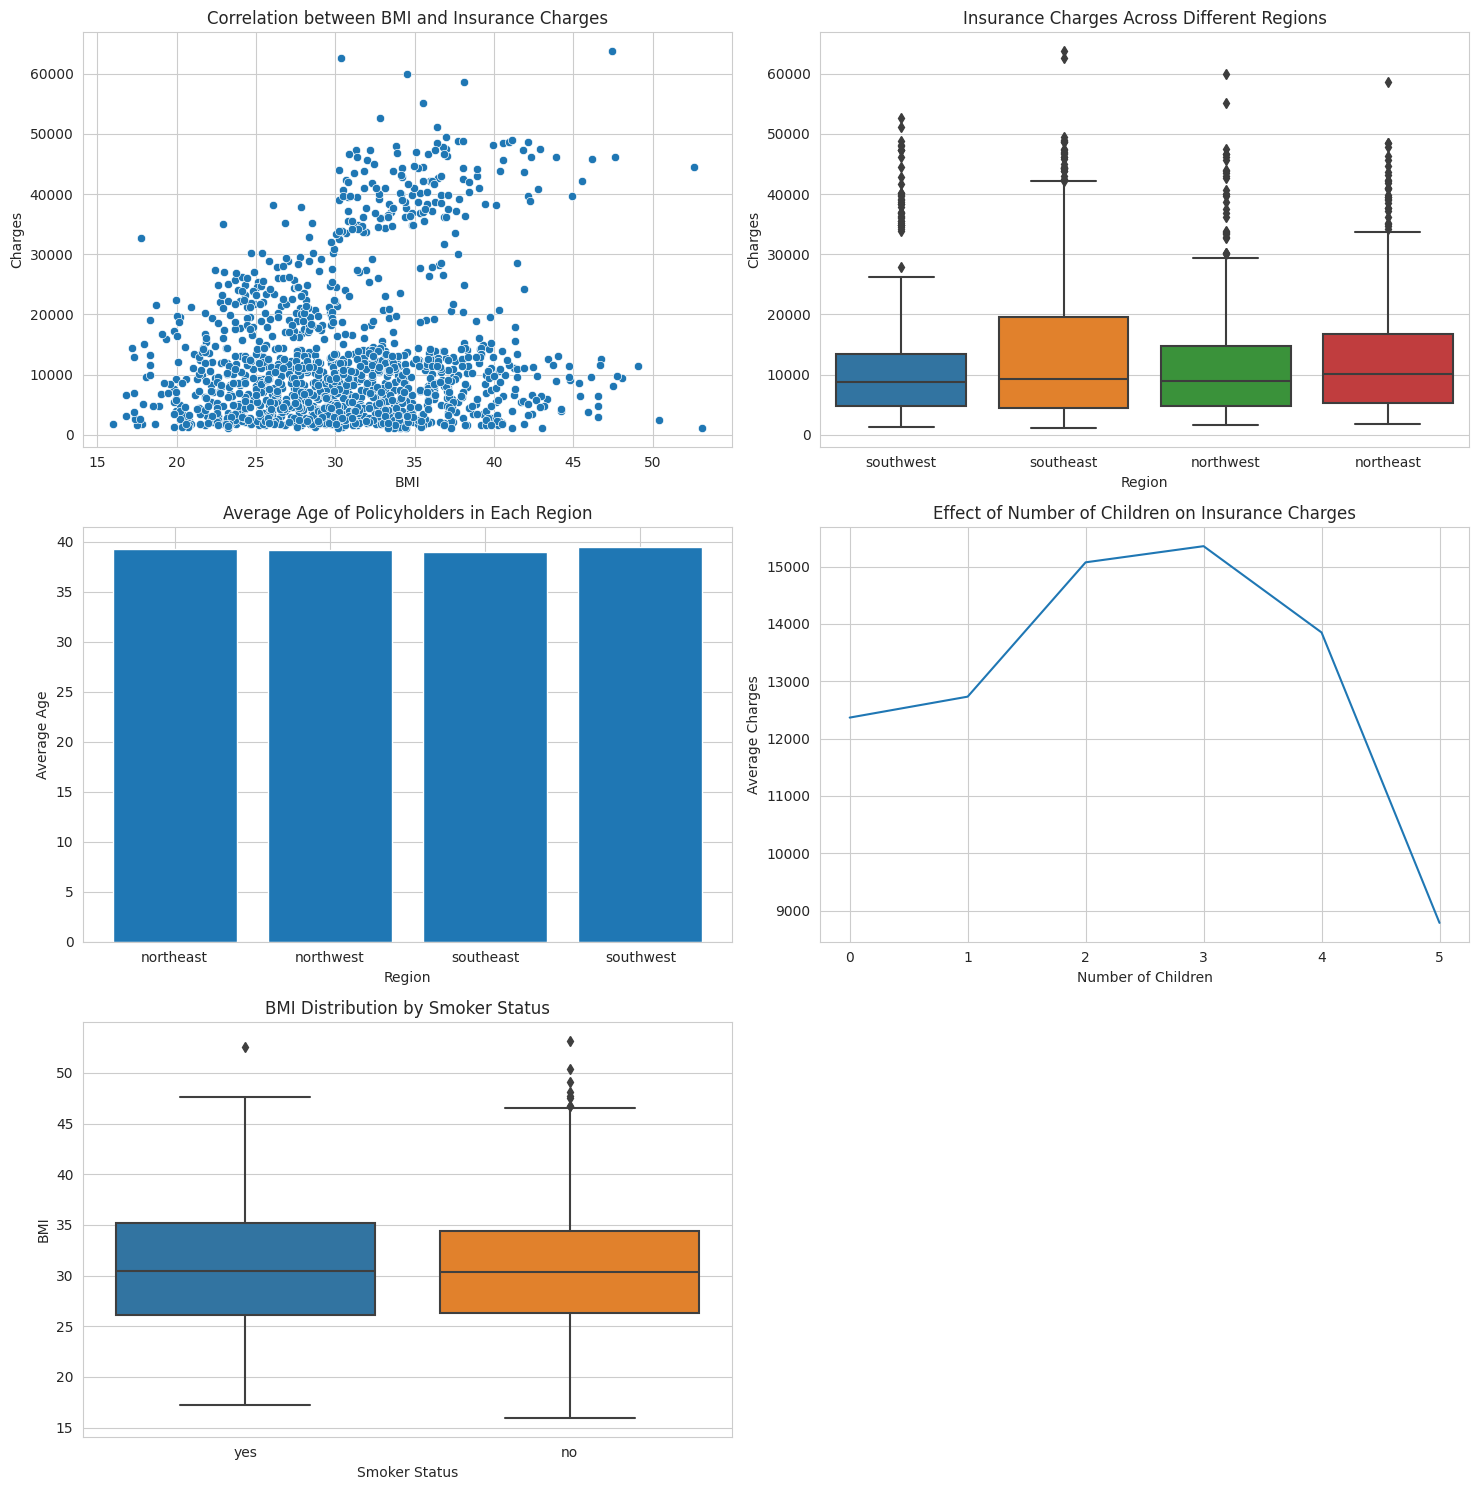

In [ ]:
# Data for visualizations
bmi_charges_data = insurance_data[['bmi', 'charges']]
region_charges_data = insurance_data[['region', 'charges']]
age_region_data = insurance_data.groupby('region')['age'].mean()
children_charges_data = insurance_data.groupby('children')['charges'].mean()
bmi_smoker_data = insurance_data[['bmi', 'smoker']]

# Creating the visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Correlation between BMI and insurance charges (Scatter plot)
sns.scatterplot(data=bmi_charges_data, x='bmi', y='charges', ax=axes[0, 0])
axes[0, 0].set_title('Correlation between BMI and Insurance Charges')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Charges')

# Insurance charges across different regions (Box plot)
sns.boxplot(data=region_charges_data, x='region', y='charges', ax=axes[0, 1])
axes[0, 1].set_title('Insurance Charges Across Different Regions')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Charges')

# Average age of policyholders in each region (Bar chart)
axes[1, 0].bar(age_region_data.index, age_region_data.values)
axes[1, 0].set_title('Average Age of Policyholders in Each Region')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Average Age')

# Effect of number of children on insurance charges (Line chart)
axes[1, 1].plot(children_charges_data.index, children_charges_data.values)
axes[1, 1].set_title('Effect of Number of Children on Insurance Charges')
axes[1, 1].set_xlabel('Number of Children')
axes[1, 1].set_ylabel('Average Charges')

# BMI distribution by smoker status (Box plot)
sns.boxplot(data=bmi_smoker_data, x='smoker', y='bmi', ax=axes[2, 0])
axes[2, 0].set_title('BMI Distribution by Smoker Status')
axes[2, 0].set_xlabel('Smoker Status')
axes[2, 0].set_ylabel('BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Hide the empty subplot (since we have an odd number of plots)
axes[2, 1].set_visible(False)

plt.show()

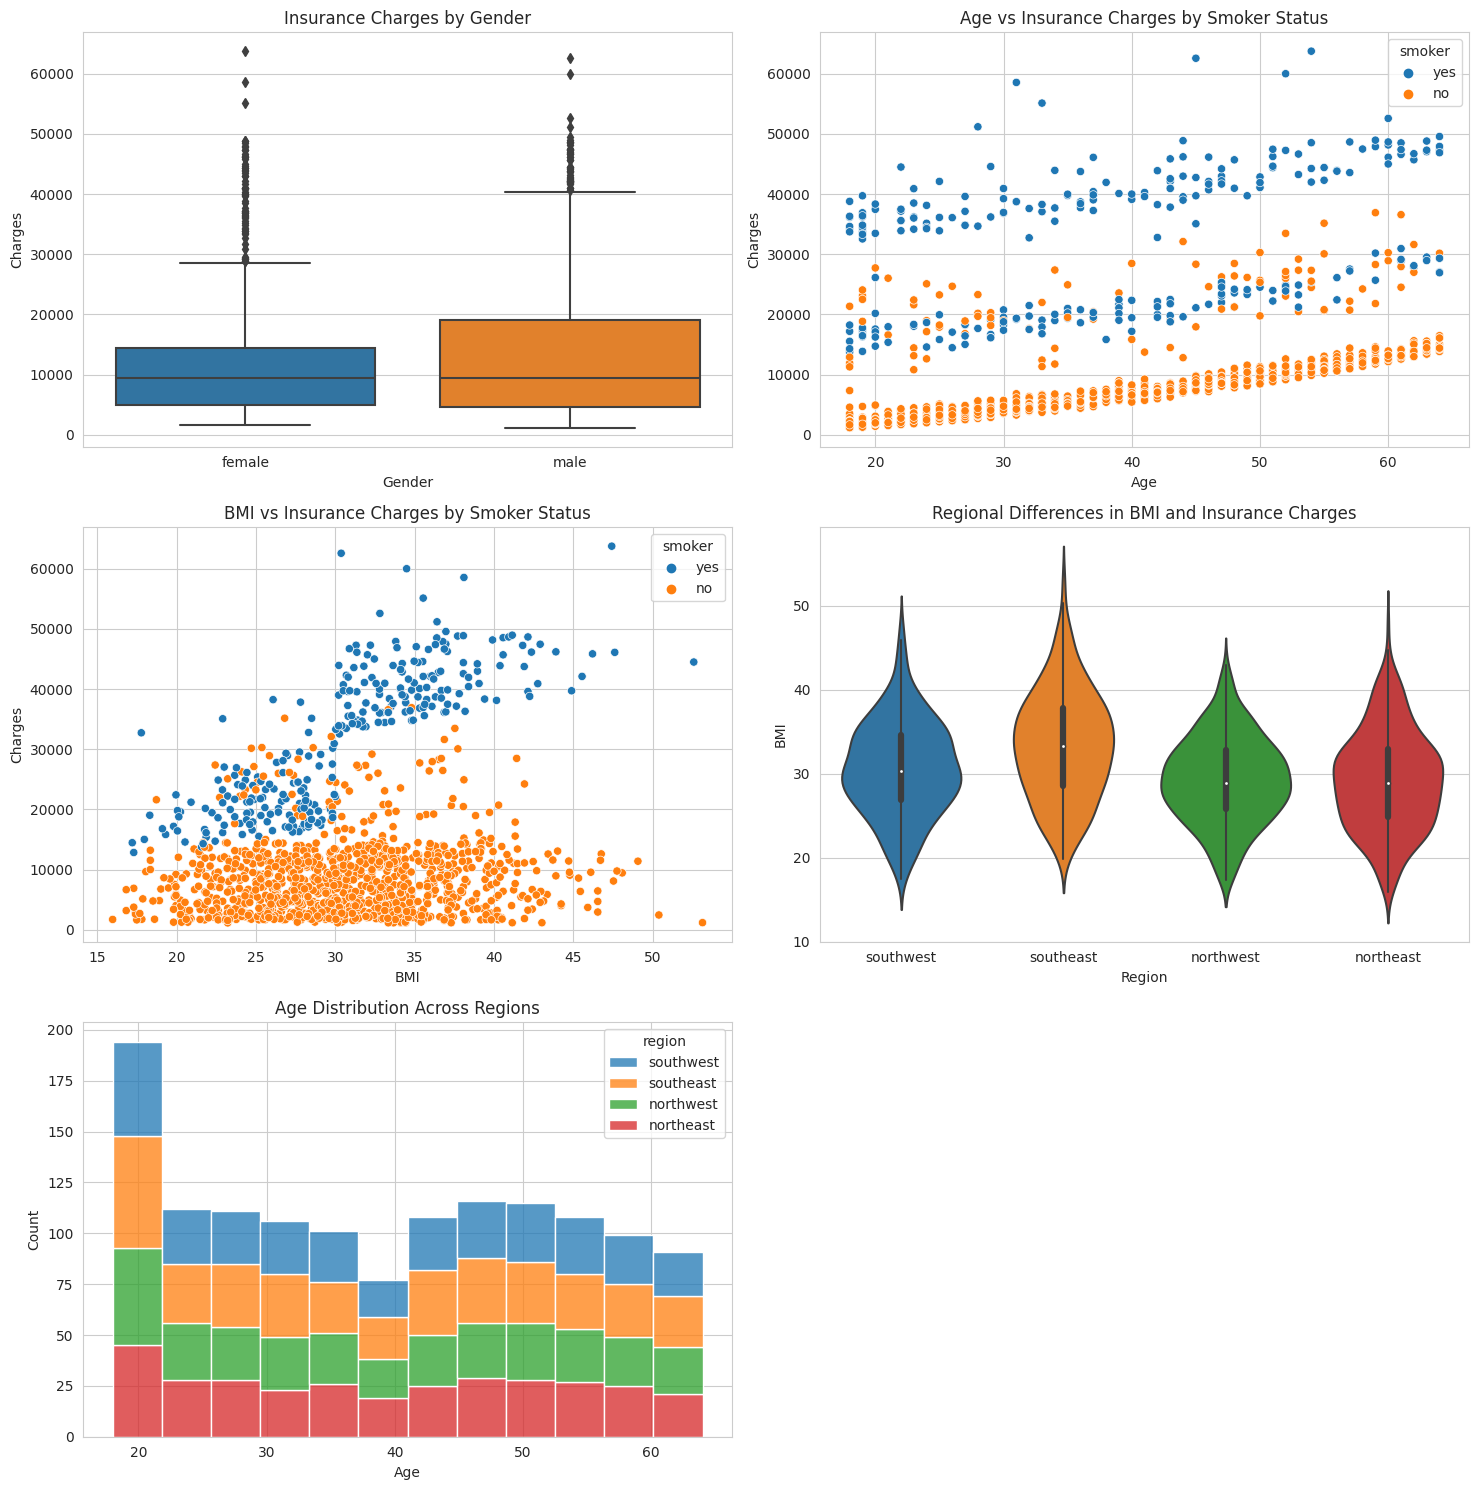

In [ ]:
# Data for visualizations
gender_charges_data = insurance_data[['sex', 'charges']]
age_smoker_charges_data = insurance_data[['age', 'smoker', 'charges']]
bmi_smoker_charges_data = insurance_data[['bmi', 'smoker', 'charges']]
region_bmi_charges_data = insurance_data[['region', 'bmi', 'charges']]
age_region_data = insurance_data[['age', 'region']]

# Creating the visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Difference in insurance charges between males and females (Box plot)
sns.boxplot(data=gender_charges_data, x='sex', y='charges', ax=axes[0, 0])
axes[0, 0].set_title('Insurance Charges by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Charges')

# Impact of age on insurance charges, with smoker status (Scatter plot with trend lines)
sns.scatterplot(data=age_smoker_charges_data, x='age', y='charges', hue='smoker', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Insurance Charges by Smoker Status')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Charges')

# Interaction effect of BMI and smoker status on insurance charges (Scatter plot with color coding)
sns.scatterplot(data=bmi_smoker_charges_data, x='bmi', y='charges', hue='smoker', ax=axes[1, 0])
axes[1, 0].set_title('BMI vs Insurance Charges by Smoker Status')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Charges')

# Regional differences in BMI and how it relates to insurance charges (Violin plot)
sns.violinplot(data=region_bmi_charges_data, x='region', y='bmi', ax=axes[1, 1])
axes[1, 1].set_title('Regional Differences in BMI and Insurance Charges')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('BMI')

# Age distribution across regions (Stacked histogram)
sns.histplot(data=age_region_data, x='age', hue='region', multiple='stack', ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution Across Regions')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Hide the empty subplot (since we have an odd number of plots)
axes[2, 1].set_visible(False)

plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

# Check if the necessary columns exist and are not entirely NaN
required_columns = ['children', 'smoker', 'age', 'bmi', 'charges']
if not all(column in insurance_data.columns for column in required_columns):
    raise ValueError("One or more required columns are missing.")
if insurance_data[required_columns].isna().all().any():
    raise ValueError("One or more required columns contain only NaN values.")

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
insurance_data[['age', 'bmi', 'charges']] = imputer.fit_transform(insurance_data[['age', 'bmi', 'charges']])

# Encoding the smoker status as it is a categorical variable
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# Define the target variable
y = insurance_data['charges']

# Redefining X with the encoded smoker status
X = insurance_data[['age', 'bmi', 'smoker']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Regression pipeline
regression_pipeline = Pipeline(steps=[('regressor', LinearRegression())])
regression_model = regression_pipeline.fit(X_train, y_train)

# Feature importance using Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

# Re-running the chi-square test
contingency_table = pd.crosstab(insurance_data['children'], insurance_data['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
chi2_result = (chi2, p)
regression_coef = regression_model.named_steps['regressor'].coef_
feature_importance = importances

chi2_result, regression_coef, feature_importance


((6.887719904947631, 0.22912555089568779),
 array([  257.04066602,   321.83997719, 23625.23448834]),
 array([0.13631509, 0.25521701, 0.60846789]))

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

# Standardizing continuous features for some models
scaler = StandardScaler()
insurance_data[['age', 'bmi', 'charges']] = scaler.fit_transform(insurance_data[['age', 'bmi', 'charges']])

# Encoding the smoker status as it is a categorical variable
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# Defining a binary target variable for logistic regression and classification tree
median_charges = insurance_data['charges'].median()
insurance_data['high_cost'] = insurance_data['charges'].apply(lambda x: 1 if x > median_charges else 0)

# Splitting the dataset into features and target for regression and classification
X_regression = insurance_data[['age', 'bmi', 'smoker']]
y_regression = insurance_data['charges']

X_classification = X_regression
y_classification = insurance_data['high_cost']

# Splitting data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_reg_model.predict(X_test_reg)
linear_reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)
y_pred_class_log = logistic_model.predict(X_test_class)
logistic_accuracy = accuracy_score(y_test_class, y_pred_class_log)
logistic_report = classification_report(y_test_class, y_pred_class_log)

# Decision Tree for Regression
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train_reg, y_train_reg)
y_pred_tree_reg = tree_reg_model.predict(X_test_reg)
tree_reg_mse = mean_squared_error(y_test_reg, y_pred_tree_reg)

# Decision Tree for Classification
tree_class_model = DecisionTreeClassifier()
tree_class_model.fit(X_train_class, y_train_class)
y_pred_tree_class = tree_class_model.predict(X_test_class)
tree_class_accuracy = accuracy_score(y_test_class, y_pred_tree_class)
tree_class_report = classification_report(y_test_class, y_pred_tree_class)

# Random Forest for Regression
forest_reg_model = RandomForestRegressor(n_estimators=100)
forest_reg_model.fit(X_train_reg, y_train_reg)
y_pred_forest_reg = forest_reg_model.predict(X_test_reg)
forest_reg_mse = mean_squared_error(y_test_reg, y_pred_forest_reg)

# Outputting the results
print("Linear Regression MSE:", linear_reg_mse)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_report)
print("Decision Tree Regressor MSE:", tree_reg_mse)
print("Decision Tree Classifier Accuracy:", tree_class_accuracy)
print("Decision Tree Classifier Report:\n", tree_class_report)
print("Random Forest Regressor MSE:", forest_reg_mse)


Linear Regression MSE: 0.2355138005515096
Logistic Regression Accuracy: 0.9104477611940298
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.88      0.93      0.90       122

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268

Decision Tree Regressor MSE: 0.26411116644787674
Decision Tree Classifier Accuracy: 0.8544776119402985
Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       146
           1       0.81      0.89      0.85       122

    accuracy                           0.85       268
   macro avg       0.85      0.86      0.85       268
weighted avg       0.86      0.85      0.85       268

Random Forest Regressor MSE: 0.17641806129797527


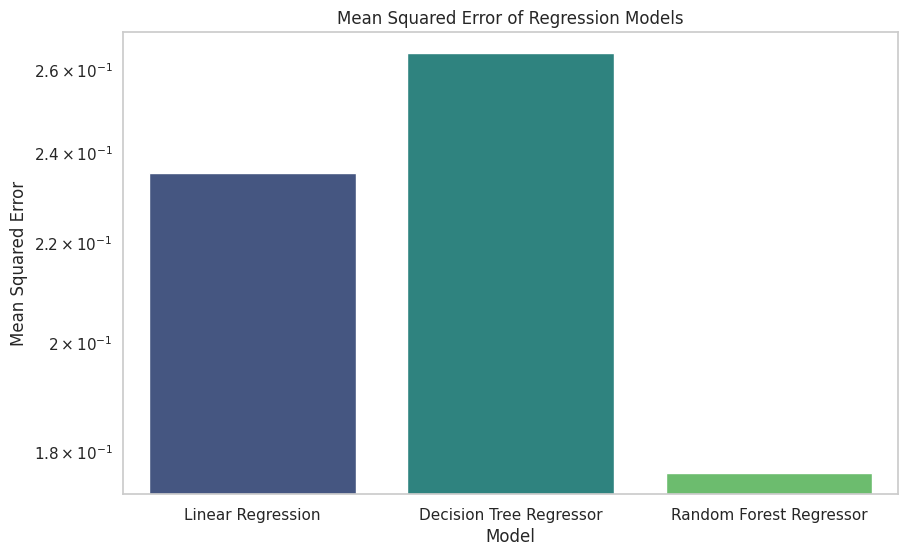

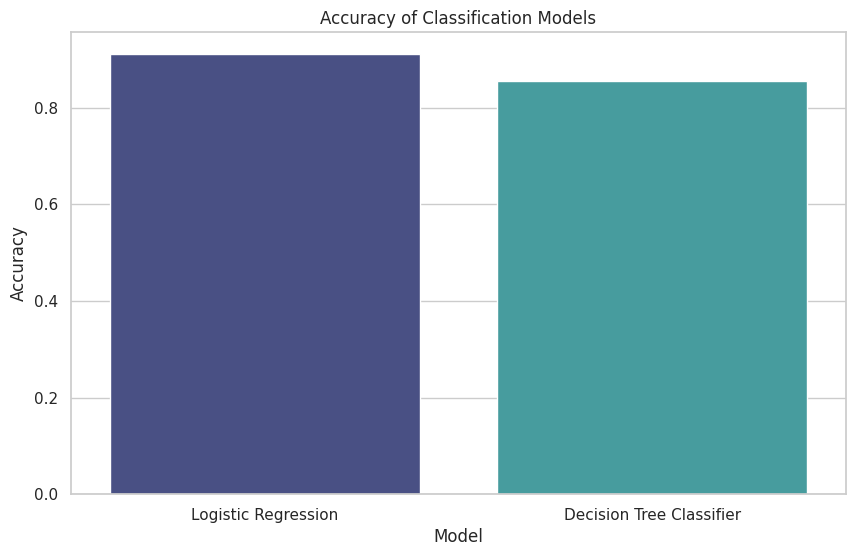

In [ ]:
# Setting up the visualization style
sns.set(style="whitegrid")

# Creating a bar chart for model performance
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
mse_values = [linear_reg_mse, tree_reg_mse, forest_reg_mse]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values, palette="viridis")
plt.title('Mean Squared Error of Regression Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.yscale('log')  # Using logarithmic scale for better visualization of differences
plt.show()

# Creating a bar chart for classification accuracies
model_names_class = ['Logistic Regression', 'Decision Tree Classifier']
accuracy_values = [logistic_accuracy, tree_class_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_class, y=accuracy_values, palette="mako")
plt.title('Accuracy of Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [ ]:
print("Based on the evaluation, the best performing models for the insurance dataset are:")
print(f"- Random Forest Regressor for regression tasks with an MSE of {forest_reg_mse:.4f}.")
print(f"- Logistic Regression for classification tasks with an accuracy of {logistic_accuracy:.2%}.")

Based on the evaluation, the best performing models for the insurance dataset are:
- Random Forest Regressor for regression tasks with an MSE of 0.1764.
- Logistic Regression for classification tasks with an accuracy of 91.04%.
